In [1]:
# This script compares performance against the market index. 
# Updated by: Kuo L. 2022-05-02

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Using pands-datareader module to connect to  yahoo finance api 
# to get close price for each ticker stock/ETF.
# for Market Index: NASDAQ Composite (^IXIC), 
#                   S&P 500 (^GSPC), 
#                   Dow Jones Industrial Average (^DJI)
#                   Russell 2000 (^RUT)

market_inx = '^GSPC' # ^GSPC for S&P 500
assets = [market_inx, 'AAPL','AMZN','GOOGL', 'DVN']
start_date = '2020-1-1'
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = start_date)['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,^GSPC,AAPL,AMZN,GOOGL,DVN
Date,,,,,
2020-01-02,3257.850098,73.785919,94.900497,1368.680054,22.118767
2020-01-03,3234.850098,73.068565,93.748497,1361.520020,22.384640
2020-01-06,3246.280029,73.650787,95.143997,1397.810059,22.650509
2020-01-07,3237.179932,73.304405,95.343002,1395.109985,22.719126
2020-01-08,3253.050049,74.483604,94.598503,1405.040039,21.912930


In [4]:
pf_data.tail() #check companies still open and public at ending date

,^GSPC,AAPL,AMZN,GOOGL,DVN
Date,,,,,
2022-06-07,4160.680176,148.710007,123.000000,2342.989990,76.766899
2022-06-08,4115.770020,147.960007,121.180000,2343.879883,76.658691
2022-06-09,4017.820068,142.639999,116.150002,2296.709961,76.579994
2022-06-10,3900.860107,137.130005,109.650002,2223.229980,74.059998
2022-06-13,3749.629883,131.880005,103.669998,2127.850098,69.239998


<AxesSubplot:xlabel='Date'>

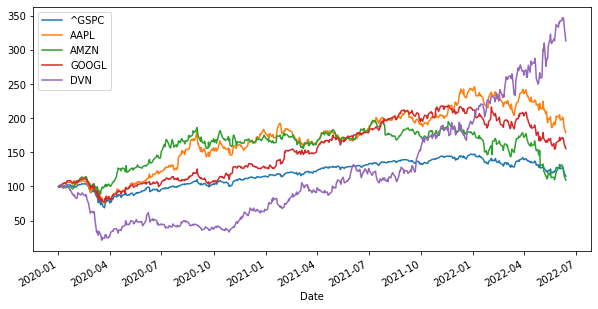

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

^GSPC    0.057057
AAPL     0.235684
AMZN     0.035870
GOOGL    0.179085
DVN      0.463130
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,^GSPC,AAPL,AMZN,GOOGL,DVN
^GSPC,0.067320,0.078776,0.060256,0.070286,0.105346
AAPL,0.078776,0.137804,0.090411,0.089078,0.092364
AMZN,0.060256,0.090411,0.137234,0.080832,0.057633
GOOGL,0.070286,0.089078,0.080832,0.110244,0.099839
DVN,0.105346,0.092364,0.057633,0.099839,0.563571


In [9]:
log_returns.corr() #get correlation between each pair.

,^GSPC,AAPL,AMZN,GOOGL,DVN
^GSPC,1.000000,0.817878,0.626901,0.815866,0.540847
AAPL,0.817878,1.000000,0.657448,0.722711,0.331433
AMZN,0.626901,0.657448,1.000000,0.657163,0.207236
GOOGL,0.815866,0.722711,0.657163,1.000000,0.400543
DVN,0.540847,0.331433,0.207236,0.400543,1.000000


***